# Part 2 - Modelling nerve fibers
Code written by Simone Romeni (simone.romeni@epfl.ch) for the EPFL course **Fundamentals of Neuronengineering - BIOENG-448**, held by Prof. Silvestro Micera.

In [1]:
from neuron import h, gui
import numpy as np
import matplotlib.pyplot as plt

## Passive cable model
### Question 1(a)
Implement a passive cable with $d = 1$ $\mu$m, $L = 2$ mm, $g_{m} = 0.001$ S/cm$^{2}$, $c_{m} = 1$ $\mu$F/cm$^{2}$, $R_{a} = 100$ $\Omega \cdot$cm. Simulate $(10^{3} + 1)$ segments. Apply a current clamp in the middle of the cable and inject a current step with amplitude $A = 1$ nA. Run the simulation and plot the time-course of the potential at different locations along the cable, and the value of the regime potential along the length of the cable. What do you observe?

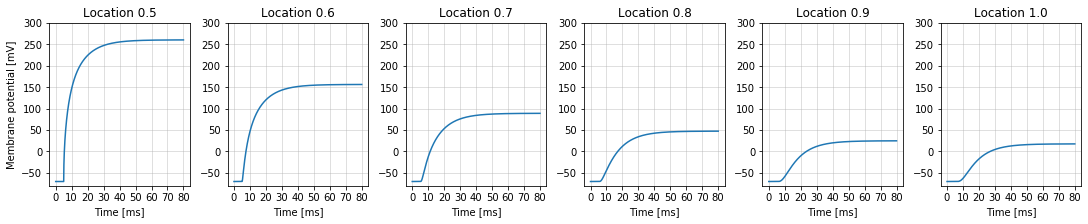

In [2]:
passive_cable = h.Section()
passive_cable.diam = 1  # [um]
passive_cable.L = 2000  # [um]
passive_cable.nseg = 1000 + 1  # [1]
passive_cable.cm = 1  # [uF/cm^2]
passive_cable.Ra = 100  # [Ohm*cm]

passive_cable.insert('pas')
passive_cable.g_pas = 1e-4  # [S/cm^2]

iclamp1 = h.IClamp(passive_cable(0.5))
iclamp1.delay = 5  # [ms]
iclamp1.dur = 80  # [ms]
iclamp1.amp = 1  # [nA]

v = [None for i in range(6)]
for i in range(6):
    v[i] = h.Vector().record(passive_cable(0.5 + i * 0.1)._ref_v)

t = h.Vector().record(h._ref_t)

h.finitialize(-70)  # initialize at rest potential
h.continuerun(80)  # run for 40 ms

for i in range(6):
    v[i] = v[i].to_python()
t = t.to_python()

v_store = v.copy()

fig, ax = plt.subplots(nrows=1, ncols=6, constrained_layout=True, figsize=(15, 3))
ax = ax.ravel()
for i in range(6):
    ax[i].plot(t, v[i])

major_ticks = np.arange(0, 90, 10)
for i in range(6):
    ax[i].set_ylim([-80, 300])
    ax[i].set_xticks(major_ticks)
    ax[i].grid(which='major', alpha=0.5)
    ax[i].set_xlabel('Time [ms]')
    loc = 0.5 + 0.1 * i
    ax[i].title.set_text('Location ' + '{0:.1f}'.format(loc))
ax[0].set_ylabel('Membrane potential [mV]');

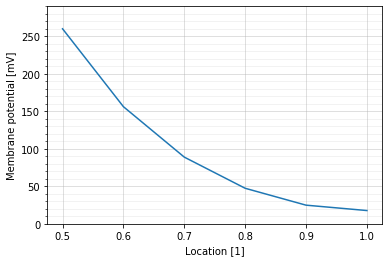

In [3]:
fig, ax = plt.subplots()
vinfty = [v[i][-1] for i in range(6)]
vinfty_store = vinfty.copy()
loc = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
ax.plot(loc, vinfty)
major_ticks = np.arange(0, 300, 50)
minor_ticks = np.arange(0, 300, 10)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)
ax.set_ylabel('Membrane potential [mV]')
ax.set_xlabel('Location [1]');

### Question 1(b)
Compare the plots from Question 1(a) to the same plots obtained when (i) $R_{a} = 200$ $\Omega\cdot$cm, (ii) $c_{m} = 0.2$ $\mu$F/cm$^{2}$. What do you observe? Are these results expected and explainable in terms of your knowledge of the passive cable equation?

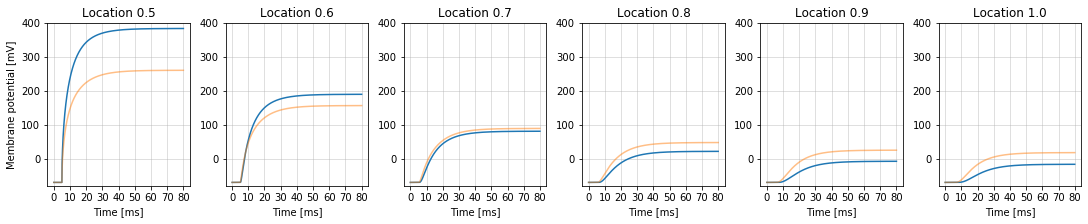

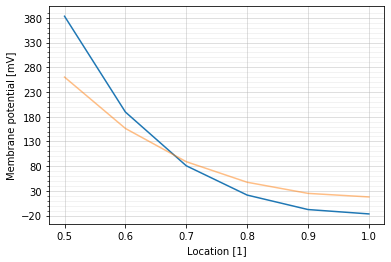

In [4]:
passive_cable = h.Section()
passive_cable.diam = 1  # [um]
passive_cable.L = 2000  # [um]
passive_cable.nseg = 1000 + 1  # [1]
passive_cable.cm = 1  # [uF/cm^2]
passive_cable.Ra = 200  # [Ohm*cm]

passive_cable.insert('pas')
passive_cable.g_pas = 1e-4  # [S/cm^2]

iclamp1 = h.IClamp(passive_cable(0.5))
iclamp1.delay = 5  # [ms]
iclamp1.dur = 80  # [ms]
iclamp1.amp = 1  # [nA]

v = [None for i in range(6)]
for i in range(6):
    v[i] = h.Vector().record(passive_cable(0.5 + i * 0.1)._ref_v)

t = h.Vector().record(h._ref_t)

h.finitialize(-70)  # initialize at rest potential
h.continuerun(80)  # run for 40 ms

for i in range(6):
    v[i] = v[i].to_python()
t = t.to_python()

fig, ax = plt.subplots(nrows=1, ncols=6, constrained_layout=True, figsize=(15, 3))
ax = ax.ravel()
for i in range(6):
    ax[i].plot(t, v[i])
    ax[i].plot(t, v_store[i], alpha=0.5)

major_ticks = np.arange(0, 90, 10)
for i in range(6):
    ax[i].set_ylim([-80, 400])
    ax[i].set_xticks(major_ticks)
    ax[i].grid(which='major', alpha=0.5)
    ax[i].set_xlabel('Time [ms]')
    loc = 0.5 + 0.1 * i
    ax[i].title.set_text('Location ' + '{0:.1f}'.format(loc))
ax[0].set_ylabel('Membrane potential [mV]')

fig, ax = plt.subplots()
vinfty = [v[i][-1] for i in range(6)]
loc = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
ax.plot(loc, vinfty)
ax.plot(loc, vinfty_store, alpha=0.5)
major_ticks = np.arange(-20, 400, 50)
minor_ticks = np.arange(-20, 400, 10)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)
ax.set_ylabel('Membrane potential [mV]')
ax.set_xlabel('Location [1]');

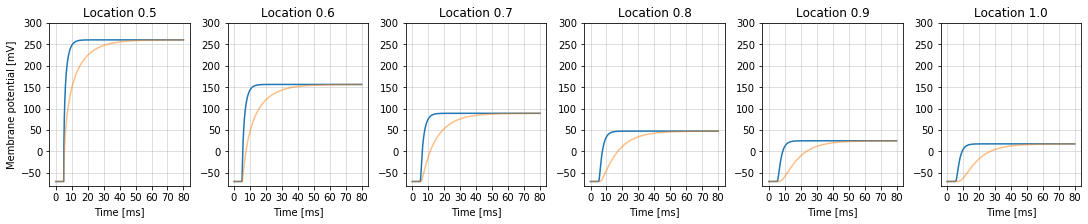

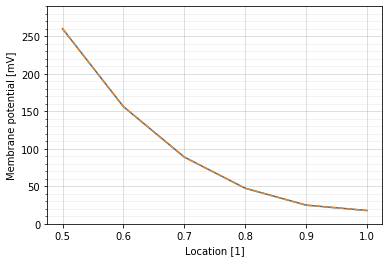

In [5]:
passive_cable = h.Section()
passive_cable.diam = 1  # [um]
passive_cable.L = 2000  # [um]
passive_cable.nseg = 1000 + 1  # [1]
passive_cable.cm = 1/5  # [uF/cm^2]
passive_cable.Ra = 100  # [Ohm*cm]

passive_cable.insert('pas')
passive_cable.g_pas = 1e-4  # [S/cm^2]

iclamp1 = h.IClamp(passive_cable(0.5))
iclamp1.delay = 5  # [ms]
iclamp1.dur = 80  # [ms]
iclamp1.amp = 1  # [nA]

v = [None for i in range(6)]
for i in range(6):
    v[i] = h.Vector().record(passive_cable(0.5 + i * 0.1)._ref_v)

t = h.Vector().record(h._ref_t)

h.finitialize(-70)  # initialize at rest potential
h.continuerun(80)  # run for 40 ms

for i in range(6):
    v[i] = v[i].to_python()
t = t.to_python()

fig, ax = plt.subplots(nrows=1, ncols=6, constrained_layout=True, figsize=(15, 3))
ax = ax.ravel()
for i in range(6):
    ax[i].plot(t, v[i])
    ax[i].plot(t, v_store[i], alpha=0.5)

major_ticks = np.arange(0, 90, 10)
for i in range(6):
    ax[i].set_ylim([-80, 300])
    ax[i].set_xticks(major_ticks)
    ax[i].grid(which='major', alpha=0.5)
    ax[i].set_xlabel('Time [ms]')
    loc = 0.5 + 0.1 * i
    ax[i].title.set_text('Location ' + '{0:.1f}'.format(loc))
ax[0].set_ylabel('Membrane potential [mV]')

fig, ax = plt.subplots()
vinfty = [v[i][-1] for i in range(6)]
loc = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
ax.plot(loc, vinfty)
ax.plot(loc, vinfty_store, linestyle='--')
major_ticks = np.arange(0, 300, 50)
minor_ticks = np.arange(0, 300, 10)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)
ax.set_ylabel('Membrane potential [mV]')
ax.set_xlabel('Location [1]');

### Question 1(c)
With the cable definition from Question 1(a), inject a short high magnitude pulse with $\text{PW} = 0.1$ ms and $A = 100$ nA. Run the simulation and plot the time-course of the potential at different locations along the cable. What do you observe? How can you compute the propagation speed of a pulse along the cable? 

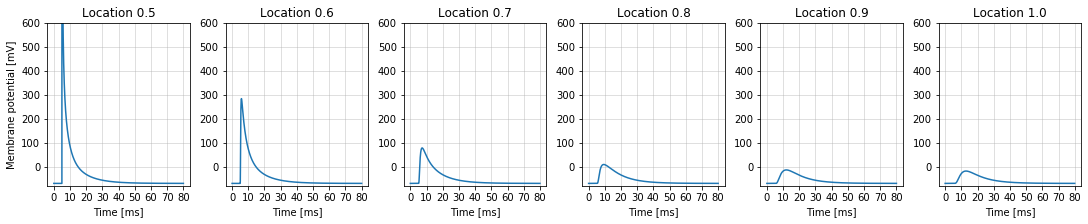

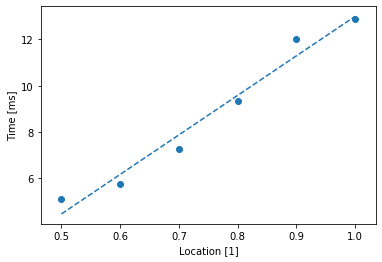

In [6]:
passive_cable = h.Section()
passive_cable.diam = 1  # [um]
passive_cable.L = 2000  # [um]
passive_cable.nseg = 1000 + 1  # [1]
passive_cable.cm = 1  # [uF/cm^2]
passive_cable.Ra = 100  # [Ohm*cm]

passive_cable.insert('pas')
passive_cable.g_pas = 1e-4  # [S/cm^2]

iclamp1 = h.IClamp(passive_cable(0.5))
iclamp1.delay = 5  # [ms]
iclamp1.dur = 0.1  # [ms]
iclamp1.amp = 100  # [nA]

v = [None for i in range(6)]
for i in range(6):
    v[i] = h.Vector().record(passive_cable(0.5 + i * 0.1)._ref_v)

t = h.Vector().record(h._ref_t)

h.finitialize(-70)  # initialize at rest potential
h.continuerun(80)  # run for 40 ms

for i in range(6):
    v[i] = v[i].to_python()
t = t.to_python()

fig, ax = plt.subplots(nrows=1, ncols=6, constrained_layout=True, figsize=(15, 3))
ax = ax.ravel()
for i in range(6):
    ax[i].plot(t, v[i])

major_ticks = np.arange(0, 90, 10)
for i in range(6):
    ax[i].set_ylim([-80, 600])
    ax[i].set_xticks(major_ticks)
    ax[i].grid(which='major', alpha=0.5)
    ax[i].set_xlabel('Time [ms]')
    loc = 0.5 + 0.1 * i
    ax[i].title.set_text('Location ' + '{0:.1f}'.format(loc))
ax[0].set_ylabel('Membrane potential [mV]')

fig, ax = plt.subplots()

t_max = [None for i in range(6)]
for i in range(6):
    t_max[i] = t[np.argmax(v[i])]

from scipy import stats
loc = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
slope, intercept, r_value, p_value, std_err = stats.linregress(loc, t_max)
ax.scatter(loc, t_max)
locs = np.linspace(0.5, 1, 100)
ax.plot(locs, locs*slope + intercept, linestyle='--')
ax.set_xlabel('Location [1]')
ax.set_ylabel('Time [ms]');

## Intuition on the role of myelin
### Question 2(a)
Run the two following simulations:
* **Source + "unmyelinated" passive cable** Connect a single-segment section containing the HH mechanism to a cable with the following parameters: $L = 1$ mm, $d = 1$ $\mu$m, $R_{a} = 100$ $\Omega$/cm, $g_{m} = 10^{-3}$ S/cm$^{2}$, $c_{m} = 1$ $\mu$F/cm$^{2}$, $V_{r} = -65$ mV (rest potential for the passive membrane), (use 11 segments).
* **Source + "myelinated" passive cable** Connect a single-segment section containing the HH mechanism to a cable with the following parameters: $L = 1$ mm, $d = 1$ $\mu$m, $R_{a} = 100$ $\Omega$/cm, $g_{m} = 10^{-4}$ S/cm$^{2}$, $c_{m} = 1$ nF/cm$^{2}$, $V_{r} = -65$ mV (rest potential for the passive membrane), (use 11 segments).

Apply to both the models a current clamp at the active section (suggested amplitude 10 nA, duration 10 ms). Plot the membrane potential at different locations along the cables. What do you observe? Is it an expected result?

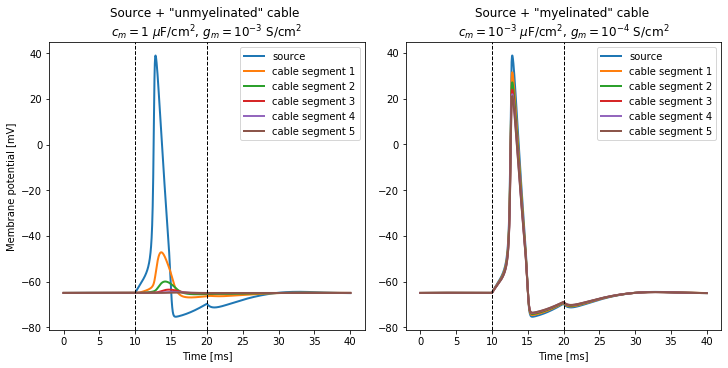

In [7]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10, 5))
ax = ax.ravel()

# create source + unmyelinated cable
source = h.Section()
source.nseg = 1

unmyel_cable = h.Section()
unmyel_cable.diam = 1  # diameter [um]
unmyel_cable.L = 1000  # length [um]
unmyel_cable.nseg = 11  # number of segments [1]
unmyel_cable.Ra = 100  # axial resistance [ohm*cm]
unmyel_cable.cm = 1e0  # membrane capacitance [uF/cm^2]

unmyel_cable.insert('pas')
unmyel_cable.g_pas = 1e-3  # membrane conductance [S/cm^2]
unmyel_cable.e_pas = -65  # rest potential [mV]

source.insert('hh')
iclamp = h.IClamp(source(0))
iclamp.delay = 10  # start of stimulation time [ms]
iclamp.dur = 10  # duration of stimulation [ms]
iclamp.amp = 10  # amplitude of stimulation [nA]

source.connect(unmyel_cable(0))

v_source = h.Vector().record(source(0.5)._ref_v)
N = 5
v_cable = [None for i in range(N)]
for i in range(N):
    v_cable[i] = h.Vector().record(unmyel_cable((i+1)/N)._ref_v)
t = h.Vector().record(h._ref_t)

h.finitialize(-65)  # initialize to rest potential [mV]
h.continuerun(40)  # run duration [ms]

v_source = v_source.to_python()
for i in range(N):
    v_cable[i] = v_cable[i].to_python()
t = t.to_python()

ax[0].plot(t, v_source, linewidth=2, label='source')
for i in range(N):
    ax[0].plot(t, v_cable[i], linewidth=2, label='cable segment ' + str(i+1))
ax[0].title.set_text('Source + "unmyelinated" cable \n' + r'$c_{m} = 1$ $\mu$F/cm$^{2}$, $g_{m} = 10^{-3}$ S/cm$^{2}$')

# refresh environment
del source
del unmyel_cable
del iclamp

# create source + myelinated cable
source = h.Section()
source.nseg = 1

myel_cable = h.Section()
myel_cable.diam = 10  # diameter [um]
myel_cable.L = 1000  # length [um]
myel_cable.nseg = 11  # number of segments [1]
myel_cable.Ra = 100  # axial resistance [ohm*cm]
myel_cable.cm = 1e-3  # membrane capacitance [uF/cm^2]

myel_cable.insert('pas')
myel_cable.g_pas = 1e-4  # membrane conductance [S/cm^2]
myel_cable.e_pas = -65  # rest potential [mV]

source.insert('hh')
iclamp = h.IClamp(source(0))
iclamp.delay = 10  # start of stimulation time [ms]
iclamp.dur = 10  # duration of stimulation [ms]
iclamp.amp = 10  # amplitude of stimulation [nA]

source.connect(myel_cable(0))

v_source = h.Vector().record(source(0.5)._ref_v)
N = 5
v_cable = [None for i in range(N)]
for i in range(N):
    v_cable[i] = h.Vector().record(myel_cable((i+1)/N)._ref_v)
t = h.Vector().record(h._ref_t)

h.finitialize(-65)  # initialize to rest potential [mV]
h.continuerun(40)  # run duration [ms]

v_source = v_source.to_python()
for i in range(N):
    v_cable[i] = v_cable[i].to_python()
t = t.to_python()

ax[1].plot(t, v_source, linewidth=2, label='source')
for i in range(N):
    ax[1].plot(t, v_cable[i], linewidth=2, label='cable segment ' + str(i+1))
ax[1].title.set_text('Source + "myelinated" cable \n' + r'$c_{m} = 10^{-3}$ $\mu$F/cm$^{2}$, $g_{m} = 10^{-4}$ S/cm$^{2}$')

ax[0].axvline(x=10, c='black', linestyle='--', linewidth=1)
ax[0].axvline(x=20, c='black', linestyle='--', linewidth=1)
ax[1].axvline(x=10, c='black', linestyle='--', linewidth=1)
ax[1].axvline(x=20, c='black', linestyle='--', linewidth=1)

ax[0].set_ylabel('Membrane potential [mV]')
ax[0].set_xlabel('Time [ms]')
ax[1].set_xlabel('Time [ms]')

ax[0].legend()
ax[1].legend()

# refresh environment
del source
del myel_cable
del iclamp

## Unmyelinated fiber model
### Questions 3(a-b)
Implement an unmelynated fiber with $d = 1$ $\mu$m, $L = 1$ cm, $g_{m} = 0.001$ S/cm$^{2}$, $c_{m} = 1$ $\mu$F/cm$^{2}$, $R_{a} = 100$ $\Omega \cdot$ cm. Simulate $(10^{3} + 1)$ segments and active Hodgkin-Huxley mechanism (with the default parameters). Apply a current clamp in the middle of the cable and inject a current with duration $\text{PW} = 5$ ms and amplitude $A = 10$ nA. Run the simulation (for approximately 100 ms, with initial membrane potential $-65$ mV) and plot the time-course of the potential at different locations along the fiber.

Repeat the previous point with $d = 0.25$ $\mu$m and $d = 0.5$ $\mu$m.

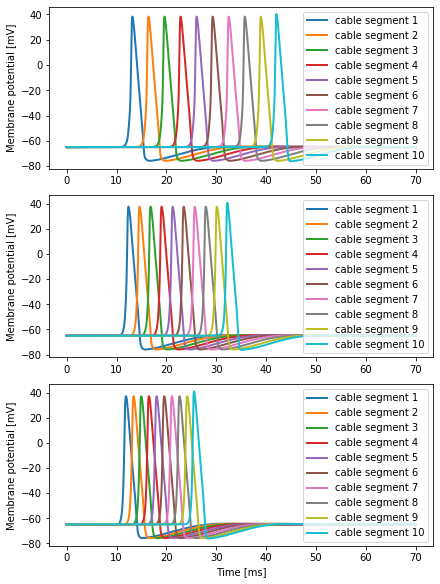

In [8]:
fig, ax = plt.subplots(3, 1, constrained_layout=True, figsize=(6, 8))
ax = ax.ravel()

dendrite = h.Section()
dendrite.L = 1e4  # [um]
dendrite.nseg = 101  # [1]
dendrite.Ra = 100  # [Ohm*cm]
dendrite.insert('hh')

iclamp = h.IClamp(dendrite(0.5))
iclamp.delay = 10  # [ms]
iclamp.dur = 5  # [ms]
iclamp.amp = 10  # [nA]

N = 10  # number of nodes we will record from

diam_list = [0.25, 0.5, 1]  # [um]
v = [None for i in range(len(diam_list))]
for j in range(len(diam_list)):
    dendrite.diam = diam_list[j]
    
    v[j] = [None for i in range(N)]
    for i in range(N):
        v[j][i] = h.Vector().record(dendrite(0.5 + (i+1)/(2*N))._ref_v)
    t = h.Vector().record(h._ref_t)

    h.finitialize(-65)
    h.continuerun(70)

    for i in range(N):
        v[j][i] = v[j][i].to_python()
    t = t.to_python()

    for i in range(N):
        ax[j].plot(t, v[j][i], linewidth=2, label='cable segment ' + str(i+1))
    ax[j].legend()
    ax[j].set_ylabel('Membrane potential [mV]')
ax[2].set_xlabel('Time [ms]');

### Question 3(c)
Compute the propagation speed along the fiber in the three cases (consider the membrane potential maximum) and compare them. Is the result expected?

In [9]:
L = 3/(2*N) * dendrite.L

T0 = t[np.argmax(v[0][6])] - t[np.argmax(v[0][3])]
v0 = L/T0

T1 = t[np.argmax(v[1][6])] - t[np.argmax(v[1][3])]
v1 = L/T1

T2 = t[np.argmax(v[2][6])] - t[np.argmax(v[2][3])]
v2 = L/T2

print('v[d = 0.5 um]/v[d = 0.25 um] =', '{0:.2f}'.format(v1/v0))
print('v[d = 1 um]/v[d = 0.5 um] =', '{0:.2f}'.format(v2/v1))

v[d = 0.5 um]/v[d = 0.25 um] = 1.45
v[d = 1 um]/v[d = 0.5 um] = 1.44


### Question 3(d)
Using the <code>extracellular</code> mechanism, apply at the center node an extracellular potential equal to $(0, -10, 10, 20, 30, 40)$ mV for 5 ms. Plot the time-course of the membrane potential different location along the fiber. What do you observe? Is it expected? 

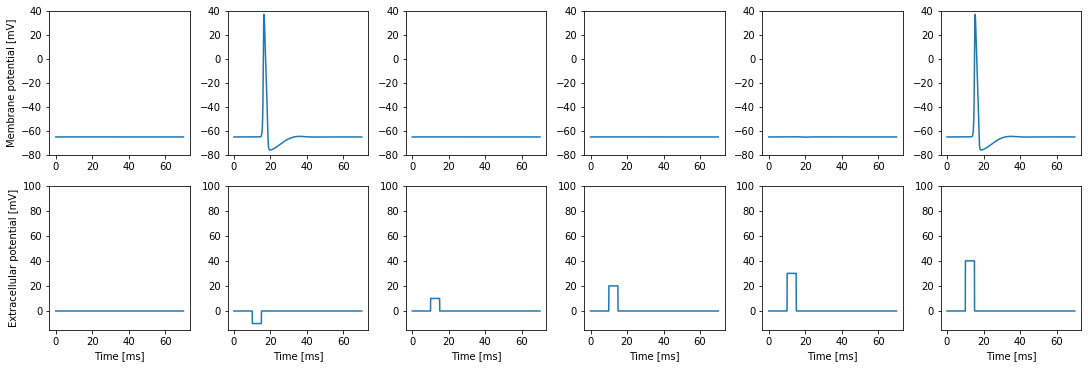

In [10]:
dendrite = h.Section()
dendrite.L = 1e4
dendrite.nseg = 101
dendrite.Ra = 100
dendrite.diam = 1
dendrite.insert('hh')
dendrite.insert('extracellular')

A = [0, -10, 10, 20, 30, 40]  # [mV]

fig, ax = plt.subplots(2, len(A), figsize=(15,5), constrained_layout=True)
ax = ax.ravel()

for i in range(len(A)):
    ve_pivot = h.Vector([0, 0, A[i], A[i], 0, 0])
    t_pivot = h.Vector([0, 10 - 1e-3, 10, 15 - 1e-3, 15, 70])  # [ms]

    ve_pivot.play(dendrite(0.5)._ref_e_extracellular, t_pivot, True)

    v = h.Vector().record(dendrite(0.5 + 0.1)._ref_v)
    ve = h.Vector().record(dendrite(0.5)._ref_e_extracellular)
    t = h.Vector().record(h._ref_t)

    h.finitialize(-65)  # initialize to rest potential
    h.continuerun(70)  # run for 70 ms

    v = v.to_python()
    ve = ve.to_python()
    t = t.to_python()

    ax[i].plot(t, v)
    ax[len(A) + i].plot(t, ve)
    ax[len(A) + i].set_xlabel('Time [ms]')
    ax[i].set_ylim([-80, 40])
    ax[len(A) + i].set_ylim(-15, 100)

ax[0].set_ylabel('Membrane potential [mV]')
ax[len(A)].set_ylabel('Extracellular potential [mV]');